In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import mysql.connector as connection

In [35]:
mydb = connection.connect(host= 'devcodecamp-mysql.c5p7yvjq1h8y.us-east-2.rds.amazonaws.com' , database= 'salesdb' , user= 'root' , password =  'D3v$tudent', use_pure = True)
select_query = 'select * from sales inner join cities on sales.City_ID = cities.City_ID'

df = pd.read_sql_query(select_query, mydb)

df.head()

C:\Users\cjska\AppData\Local\Temp\ipykernel_19732\1051503755.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(select_query, mydb)


,Invoice_ID,Customer_Type,Gender,Product_Line,Unit_Price,Quantity,Sales_Tax,Total,Date,Time,Payment,COGS,Gross_Income,Rating,City_ID,City_ID,City
0,101-17-6199,Normal,Male,Food and beverages,45.79,7,None,336.5565,3/13/2019,19:44,Credit card,320.53,16.0265,7.0,1,1,Seattle
1,101-81-4070,Member,Female,Health and beauty,62.82,2,None,131.9220,1/17/2019,12:36,Ewallet,125.64,6.2820,4.9,3,3,Milwaukee
2,102-06-2002,Member,Male,Sports and travel,25.25,5,None,132.5625,3/20/2019,17:52,Cash,126.25,6.3125,6.1,3,3,Milwaukee
3,102-77-2261,Member,Male,Health and beauty,65.31,7,None,480.0285,3/5/2019,18:02,Credit card,457.17,22.8585,4.2,3,3,Milwaukee
4,105-10-6182,Member,Male,Fashion accessories,21.48,2,None,45.1080,2/27/2019,12:22,Ewallet,42.96,2.1480,6.6,1,1,Seattle


There is double of the CITY_ID which is a non needed column. The shorthand fix to this is to use pandas T (transpose) value to utalise the .drop_duplicates attrribute.

In [36]:
df2=df.T.drop_duplicates().T

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Invoice_ID     1000 non-null   object
 1   Customer_Type  1000 non-null   object
 2   Gender         1000 non-null   object
 3   Product_Line   1000 non-null   object
 4   Unit_Price     1000 non-null   object
 5   Quantity       1000 non-null   object
 6   Sales_Tax      0 non-null      object
 7   Total          1000 non-null   object
 8   Date           1000 non-null   object
 9   Time           1000 non-null   object
 10  Payment        1000 non-null   object
 11  COGS           1000 non-null   object
 12  Gross_Income   1000 non-null   object
 13  Rating         1000 non-null   object
 14  City_ID        1000 non-null   object
 15  City           1000 non-null   object
dtypes: object(16)
memory usage: 125.1+ KB


## Since sales tax is all null there is no need to have the column. the whole colums will be dropped in order to giev a clean table.

In [37]:
cdf = df2.T.drop('Sales_Tax').T

cdf.head()

,Invoice_ID,Customer_Type,Gender,Product_Line,Unit_Price,Quantity,Total,Date,Time,Payment,COGS,Gross_Income,Rating,City_ID,City
0,101-17-6199,Normal,Male,Food and beverages,45.79,7,336.5565,3/13/2019,19:44,Credit card,320.53,16.0265,7.0,1,Seattle
1,101-81-4070,Member,Female,Health and beauty,62.82,2,131.922,1/17/2019,12:36,Ewallet,125.64,6.282,4.9,3,Milwaukee
2,102-06-2002,Member,Male,Sports and travel,25.25,5,132.5625,3/20/2019,17:52,Cash,126.25,6.3125,6.1,3,Milwaukee
3,102-77-2261,Member,Male,Health and beauty,65.31,7,480.0285,3/5/2019,18:02,Credit card,457.17,22.8585,4.2,3,Milwaukee
4,105-10-6182,Member,Male,Fashion accessories,21.48,2,45.108,2/27/2019,12:22,Ewallet,42.96,2.148,6.6,1,Seattle


In [38]:
cdf['Date'] = pd.to_datetime(cdf['Date'])
## cdf['Time'] = pd.to_datetime(cdf['Time'], format = '%H:%M').dt.time

cdf.info()
cdf.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Invoice_ID     1000 non-null   object        
 1   Customer_Type  1000 non-null   object        
 2   Gender         1000 non-null   object        
 3   Product_Line   1000 non-null   object        
 4   Unit_Price     1000 non-null   object        
 5   Quantity       1000 non-null   object        
 6   Total          1000 non-null   object        
 7   Date           1000 non-null   datetime64[ns]
 8   Time           1000 non-null   object        
 9   Payment        1000 non-null   object        
 10  COGS           1000 non-null   object        
 11  Gross_Income   1000 non-null   object        
 12  Rating         1000 non-null   object        
 13  City_ID        1000 non-null   object        
 14  City           1000 non-null   object        
dtypes: datetime64[ns](1), 

,Invoice_ID,Customer_Type,Gender,Product_Line,Unit_Price,Quantity,Total,Date,Time,Payment,COGS,Gross_Income,Rating,City_ID,City
0,101-17-6199,Normal,Male,Food and beverages,45.79,7,336.5565,2019-03-13,19:44,Credit card,320.53,16.0265,7.0,1,Seattle
1,101-81-4070,Member,Female,Health and beauty,62.82,2,131.922,2019-01-17,12:36,Ewallet,125.64,6.282,4.9,3,Milwaukee
2,102-06-2002,Member,Male,Sports and travel,25.25,5,132.5625,2019-03-20,17:52,Cash,126.25,6.3125,6.1,3,Milwaukee
3,102-77-2261,Member,Male,Health and beauty,65.31,7,480.0285,2019-03-05,18:02,Credit card,457.17,22.8585,4.2,3,Milwaukee
4,105-10-6182,Member,Male,Fashion accessories,21.48,2,45.108,2019-02-27,12:22,Ewallet,42.96,2.148,6.6,1,Seattle


How many sales were made for members vs. normal customers?


How many sales were made at each store location?

How many sales were made for each product line?

What is the overall average rating, based on all sales records?


In [39]:
sales_type = cdf['Customer_Type'].value_counts()

sales_type

Member    501
Normal    499
Name: Customer_Type, dtype: int64

In [40]:
store_sales= cdf['City'].value_counts()

store_sales

Seattle          340
New York City    332
Milwaukee        328
Name: City, dtype: int64

In [41]:
product_sales = cdf['Product_Line'].value_counts()

product_sales

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product_Line, dtype: int64

In [42]:
avg_rating = cdf['Rating'].median()

avg_rating

7.0

Text(0.5, 1.0, 'members vs. normal')

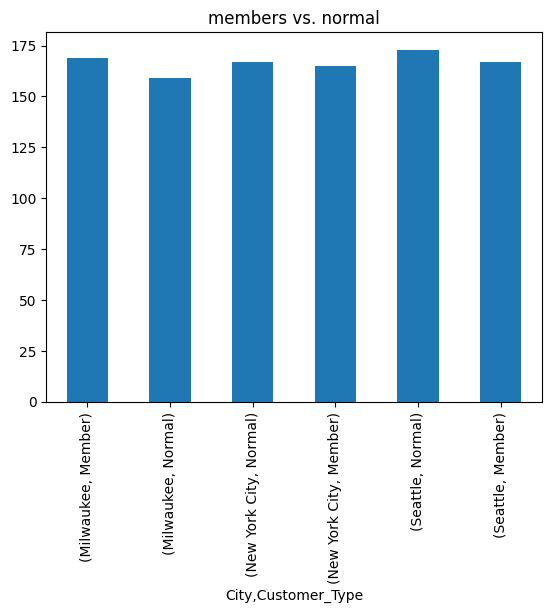

In [83]:
avg_rat_city = cdf.groupby(['City']).value_counts(['Customer_Type'])

avg_rat_city.plot.bar()

plt.title('members vs. normal')

<AxesSubplot: >

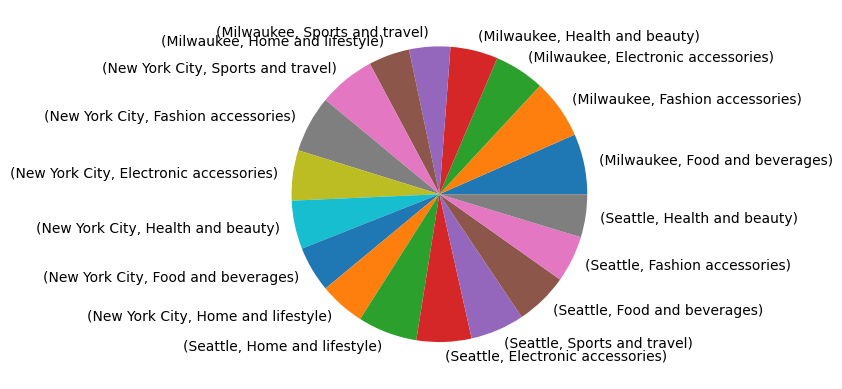

In [92]:
product_city = cdf.groupby(['City']).value_counts(['Product_Line'])

product_city.plot.pie()

<AxesSubplot: >

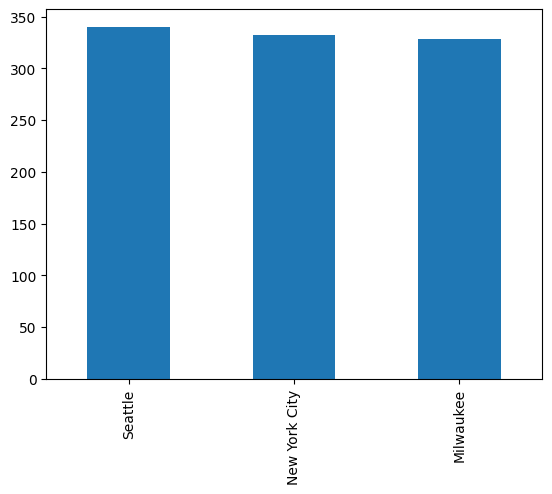

In [86]:
sales = cdf['City'].value_counts()

sales.plot.bar()